In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ibm-watson
!pip install pygooglenews --upgrade

     |████████████████████████████████| 412 kB 7.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 68 kB 9.4 MB/s 
     |████████████████████████████████| 49 kB 7.9 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 138 kB 71.4 MB/s 
  Created wheel for ibm-watson: filename=ibm_watson-5.3.0-py3-none-any.whl size=408872 sha256=27b0dc78cdce76510c2943b2661a7e66f720a0ea8ac747e075768e33d56cdae5
  Stored in directory: /root/.cache/pip/wheels/21/d9/82/4ce5b94730bc4f1f7b4c6384f72964b9b8f79fcc125bb8085c
  Created wheel for ibm-cloud-sdk-core: filename=ibm_cloud_sdk_core-3.13.2-py3-none-any.whl size=83241 sha256=2d7715b4bb130837191927d490c7a33f96f0805ebe36ba639d169372069bdf6b
  Stored in directory: /root/.cache/pip/wheels/f0/0d/5c/0c26fcc2db712e8d270e52f7c9f6d8abe33ca79ec29438aa14
Successfully built ibm-watson ibm-cloud-sdk

In [ ]:
from pygooglenews import GoogleNews
import datetime
import time
from datetime import timezone
from datetime import datetime
import json
import numpy as np
import pandas as pd
from ibm_watson import ToneAnalyzerV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator 
import json

gn = GoogleNews()

def create_week_data(ts=1449341520):
  df = pd.DataFrame()

  search = gn.search('Bitcoin', from_=datetime.fromtimestamp(ts).strftime('%Y-%m-%d'), to_=datetime.fromtimestamp(ts+220600).strftime('%Y-%m-%d'))

  titles=[]
  dates=[]
  timestamps=[]

  for item in search["entries"]:
    try:
      titles.append(item["title"])
      dates.append(item["published"])
    except:
      titles.append("<PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>")
      dates.append("aaaaa01aJana2016aa")


  df["published"] = dates
  df["title"] = titles

  for item in dates:
    month = 1

    if (item[8:11] == "Jan"):
      month = 1
    elif (item[8:11] == "Feb"):
      month = 2
    elif (item[8:11] == "Mar"):
      month = 3
    elif (item[8:11] == "Apr"):
      month = 4
    elif (item[8:11] == "May"):
      month = 5
    elif (item[8:11] == "Jun"):
      month = 6
    elif (item[8:11] == "Jul"):
      month = 7
    elif (item[8:11] == "Aug"):
      month = 8
    elif (item[8:11] == "Sep"):
      month = 9
    elif (item[8:11] == "Oct"):
      month = 10
    elif (item[8:11] == "Nov"):
      month = 11
    elif (item[8:11] == "Dec"):
      month = 12

    dt = item[5:7]+"/"+str(month)+"/"+item[12:16]

    timestamps.append(int(time.mktime(datetime.strptime(dt, "%d/%m/%Y").timetuple())))


  df["timestamp"] = timestamps

  return df

watson_api_key = ""
watson_url = ""

authenticator = IAMAuthenticator(watson_api_key)
tone_analyzer = ToneAnalyzerV3(version='2021-11-27', authenticator=authenticator)
tone_analyzer.set_service_url(watson_url)

def to_tone(df):
  toneData = pd.DataFrame()
  tones = []
  timestamps = []

  for index, row in df.iterrows():
    timestamp = row["timestamp"]
    title = row["title"]

    # while (len(title) < 100):
    #   title = title+" Great"

    dump = json.dumps(tone_analyzer.tone(title).get_result())[10:]
    tone_id = 0;

    if (dump.find("Joy") >= 0):
      tone_id = 1
    elif (dump.find("Anger") >= 0):
      tone_id = 2
    elif (dump.find("Fear") >= 0):
      tone_id = 3
    elif (dump.find("Sadness") >= 0):
      tone_id = 4
    elif (dump.find("Analytical") >= 0):
      next
    elif (dump.find("Confident") >= 0):
      next
    elif (dump.find("Tentative") >= 0):
      next
    else:
      tone_id = 0

    tones.append(tone_id)
    timestamps.append(timestamp)

    if (len(tones) >= 1):
      break

  toneData["timestamp"] = timestamps
  toneData["tone_id"] = tones


  return toneData

np.set_printoptions(precision=15, suppress=True)
btc_data = pd.read_csv(
    "/content/drive/MyDrive/Science Fair/output.csv",
    names=["Time", "Open"])

btc_data["Tone"] = None

ts = 1582761600

print(len(btc_data))

toneColumn = pd.DataFrame(columns=['Tone'])
previousPos = 0 

allIndex = [0, 1, 860, 1617, 2457, 3260, 4097, 5014, 5772, 6505, 7438, 8333, 9062, 9814, 10652, 11539, 12452, 13348, 14132, 14948, 15748, 16357, 16881, 17742, 18582, 19349, 20134, 20928, 21757, 22331, 22837, 23785, 24569, 25415, 26238, 27004, 27854, 28671, 29403, 30007, 30666, 31257, 31854, 32595, 33318, 33964, 34741, 35534, 36419, 37205, 38000, 38624, 39272, 39971, 40773, 41431, 42303, 43140, 43814, 44666, 45631, 46546, 47331, 48077, 48925, 49610, 50456, 51352, 52178, 52983, 53874, 54596, 55157, 55851, 56677, 57426, 58201, 59014, 59901, 60715, 61507, 62121, 62697, 63430, 64297, 65088, 65801, 66615, 67405, 68175, 69012, 69654, 70192, 70885, 71658, 72378, 73134, 74015, 74816, 75541, 76388, 77160, 77911, 78726, 79537, 80247, 80978, 81843, 82704, 83425, 84115, 84886, 85641, 86380, 87207, 88016, 88818, 89599, 90348, 90972, 91654, 92241, 92829, 93607, 94422, 95189, 95973, 96794, 97609, 98341, 99129, 99963, 100736, 101519, 102336, 103105, 103752, 104623, 105382, 106176, 106935, 107634, 108256, 108989, 109767, 110467, 111160, 111909, 112671, 113254, 114020, 114790, 115428, 116195, 116992, 117796, 118707, 119694, 120698, 121559, 122134, 122516, 122896, 123471, 124211, 125039, 125787, 126790, 127793, 128783, 129759, 130737, 131731, 132703, 133477, 134126, 134666, 135213, 135864, 136626, 137631, 138636, 139579, 140548, 141514, 142421, 143218, 144210, 145197, 146061, 146605, 147421, 148404, 149404, 150040, 150743, 151472, 152199, 153015, 153738, 154260, 154871, 155455, 156037, 156853, 157627, 158272, 159002, 159733, 160263, 160774, 161297, 161732, 162273, 162974, 163738, 164314, 164954, 165672, 166292, 166922, 167509, 167980, 168510, 169221, 169978, 170585, 171189, 171885, 172435, 172841, 173276, 173719, 174304, 174929, 175579, 176159, 176754, 177471, 178081, 178534, 178907, 179396, 179978, 180552, 181227, 181814, 182353, 182978, 183799, 184497, 185239, 185959, 186703, 187349, 188230, 188924, 189518, 190180, 190930, 191598, 192285, 192858, 193404, 194086, 194803, 195423, 195989, 196613, 197171, 197632, 198322, 199183, 200049, 200863, 201719, 202499, 203312, 204222, 205091, 205733, 206378, 207001, 207681, 208570, 209504, 210358, 211302, 212213, 213129, 213793, 214373, 215033, 215816, 216508, 217266, 218062, 218654, 219426, 220162, 220673, 221273, 221971, 222631, 223254, 223892, 224495, 225210, 225958, 226672, 227247, 227803, 228329, 228872, 229345, 230100, 230768, 231313, 231871, 232473, 232902, 233282, 233868, 234432, 234901, 235452, 236010, 236531, 237053, 237664, 238167, 238566, 239083, 239620, 240096, 240819, 241456, 241966, 242451, 242938, 243230, 243722, 244302, 244981, 245729, 246593, 247521, 248313, 249102, 249819, 250460, 251070, 251716, 252377, 252974, 253607, 254277, 254843, 255444, 256030, 256421, 256857, 257565, 258224, 258766, 259535, 260249, 260902, 261399, 262090, 262569, 263104, 263684, 264349, 264979, 265580, 266235, 266832, 267498, 268207, 268726, 269092, 269582, 270160, 270809, 271410, 272079, 272760, 273353, 273946, 274418, 275044, 275820, 276523, 277096, 277692, 278426, 279059, 279749, 280395, 280972, 281450, 282191, 282957, 283772, 284434, 285041, 285628, 286336, 286951, 287456, 287865, 288387, 289045, 289613, 290261, 290938, 291546, 292032, 292646, 293150, 293495, 294075, 294771, 295335, 295885, 296501, 297078, 297665, 298231, 298686, 299170, 299648, 300293, 300885, 301355, 301989, 302503, 303046, 303624, 304061, 304522, 304997, 305649, 306318, 306896, 307508, 308078, 308567, 309186, 309834, 310276, 310829, 311461, 312015, 312582, 313295, 313946, 314465, 315092, 315686, 316231, 316802, 317488, 318214, 318858, 319660, 320362, 320999, 321649, 322313, 322865, 323450, 324182, 324836, 325378, 326086, 326807, 327554, 328287, 328839, 329303, 329874, 330525, 331131, 331884, 332676, 333398, 334044, 334552, 335061, 335641, 336209, 336973, 337653, 338287, 339137, 339934, 340547, 341129, 341671, 342095, 342780, 343470, 344097, 344778, 345513, 346177, 346828, 347350, 347849, 348349, 348918, 349626, 350260, 350867, 351510, 352199, 352935, 353590, 354123, 354553, 355298, 355996, 356680, 357407, 358185, 358935, 359485, 360092, 360716, 361179, 361763, 362466, 363179, 363768, 364411, 365132, 365762, 366315, 366884, 367468, 368034, 368726, 369406, 370210, 371056, 371902, 372765, 373531, 374243, 374881, 375491, 376162, 376944, 377754, 378621, 379481, 380321, 381078, 381826, 382361, 383108, 383990, 384815, 385679, 386605, 387591, 388506, 389487, 390380, 391327, 392135, 392961, 393737, 394599, 395569, 396522, 397394, 398100, 398892, 399690, 400512, 401365, 402318, 403189, 404088, 404954, 405746, 406545, 407309, 408063, 408769, 409660, 410535, 411333, 412168, 412973, 413675, 414231, 414806, 415244, 415915, 416732, 417592, 418393, 419186, 420061, 420947, 421645, 422228, 422804, 423446, 424299, 425138, 426003, 426898, 427843, 428725, 429544, 430304, 431042, 431725, 432587, 433503, 434271, 435085, 435958, 436747, 437485, 438159, 438739, 439410, 440121, 441006, 441854, 442709, 443637, 444559, 445302, 446085, 446840, 447589, 448440, 449295, 450112, 450926, 451806, 452644, 453332, 454156, 455123, 455878, 456553, 457431, 458301, 459177, 460097, 460989, 461902, 462740, 463587, 464425, 465175, 466021, 466759, 467641, 468575, 469530, 470447, 471350, 472253, 473060, 473886, 474809, 475686, 476498, 477413, 478355, 479279, 480040, 480900, 481709, 482560, 483497, 484399, 485248, 486186, 487139, 488006, 488716, 489669, 490619, 491560, 492480, 493365, 494256, 495172, 496069, 496811, 497460, 498262, 499013, 499823, 500640, 501449, 502232, 503031, 503872, 504455, 505037, 505711, 506338, 507069, 507966, 508792, 509648, 510524, 511415, 512119, 512860, 513647, 514460, 515308, 516172, 517061, 517938, 518862, 519793, 520654, 521427, 522283, 523189, 524069, 524974, 525897, 526875, 527870, 528871, 529757, 530619, 531566, 532554, 533538, 534527, 535512, 536471, 537430, 538415, 539358, 540175, 540994, 541951, 542920, 543901, 544893, 545859, 546844, 547841, 548833, 549746, 550693, 551685, 552649, 553645, 554651, 555655, 556658, 557668, 558674, 559665, 560626, 561593, 562567, 563570, 564573, 565575, 566565, 567544, 568520, 569465, 570388, 571363, 572367, 573354, 574353, 575355, 576333, 577323, 578266, 579219, 580171, 581158, 582141, 583133, 584130, 585131, 586101, 587091, 588030, 588958, 589900, 590860, 591856, 592851, 593847, 594825, 595795, 596769, 597686, 598645, 599587, 600582, 601559, 602546, 603537, 604473, 605450, 606431, 607371, 608315, 609268, 610239, 611193, 612161, 613138, 614039, 614951, 615934, 616835, 617683, 618560, 619513, 620519, 621510, 622505, 623458, 624405, 625385, 626376, 627350, 628346, 629350, 630352, 631349, 632343, 633306, 634313, 635289, 636223, 637152, 638092, 639068, 640022, 641011, 642007, 642972, 643945, 644921, 645860, 646780, 647680, 648657, 649574, 650542, 651530, 652470, 653380, 654327, 655317, 656242, 657187, 658173, 659176, 660160, 661155, 662132, 663114, 664091, 665079, 666078, 667050, 668053, 669057, 670039, 671041, 672035, 673028, 674024, 675023, 675962, 676874, 677874, 678878, 679872, 680876, 681869, 682859, 683844, 684818, 685762, 686710, 687703, 688696, 689690, 690691, 691678, 692680, 693677, 694687, 695690, 696698, 697708, 698718, 699722, 700725, 701724, 702689, 703686, 704683, 705668, 706667, 707668, 708655, 709647, 710649, 711653, 712661, 713671, 714679, 715651, 716649, 717652, 718654, 719630, 720615, 721589, 722580, 723556, 724538, 725490, 726450, 727435, 728418, 729399, 730397, 731394, 732385, 733329, 734293, 735204, 736165, 737156, 738131, 739082, 740056, 741032, 741976, 742894, 743797, 744753, 745744, 746735, 747713, 748684, 749665, 750672, 751682, 752668, 753668, 754654, 755625, 756626, 757611, 758614, 759616, 760615, 761600, 762603, 763612, 764618, 765589, 766595, 767596, 768599, 769598, 770596, 771578, 772535, 773493, 774429, 775424, 776418, 777417, 778418, 779422, 780432, 781439, 782431, 783425, 784402, 785407, 786415, 787423, 788430, 789440, 790450, 791453, 792455, 793460, 794467, 795472, 796479, 797486, 798479, 799473, 800480, 801489, 802492, 803486, 804454, 805453, 806463, 807473, 808471, 809467, 810476, 811480, 812470, 813478, 814487, 815497, 816506, 817516, 818526, 819488, 820498, 821507, 822516, 823523, 824530, 825539, 826549, 827544, 828554, 829564, 830574, 831584, 832594, 833604, 834614, 835624, 836632, 837642, 838652, 839662, 840655, 841658, 842663, 843673, 844683, 845693, 846703, 847713, 848722, 849732, 850742, 851752, 852752, 853762, 854772, 855780, 856789, 857799, 858809, 859819, 860829, 861839, 862849, 863859, 864869, 865860, 866869, 867879, 868889, 869899, 870909, 871919, 872929, 873939, 874949, 875959, 876969, 877979, 878989, 879999, 881003, 882003, 883013, 884021, 885029, 886039, 887049, 888059, 889069, 890079, 891089, 892099, 893106, 894114, 895124, 896131, 897140, 898150, 899155, 900165, 901173, 902176, 903178, 904173, 905179, 906187, 907186, 908195, 909205, 910212, 911222, 912232, 913241, 914242, 915250, 916260, 917270, 918280, 919290, 920292, 921301, 922311, 923321, 924327, 925335, 926337, 927343, 928352, 929362, 930372, 931382, 932390, 933400, 934410, 935419, 936425, 937433, 938443, 939453, 940461, 941471, 942481, 943487, 944494, 945500, 946506, 947513, 948522, 949527, 950529, 951526, 952534, 953538, 954524, 955521, 956525, 957529, 958535, 959543, 960553, 961563, 962573, 963580, 964584, 965591, 966594, 967603, 968597, 969605, 970601, 971608, 972617, 973598, 974603, 975609, 976617, 977623, 978630, 979639, 980636, 981640, 982647, 983636, 984627, 985617, 986617, 987624, 988634, 989643, 990652, 991662, 992672, 993681, 994685, 995695, 996703, 997712, 998722, 999732, 1000740, 1001749, 1002753, 1003741, 1004741, 1005739, 1006745, 1007755, 1008764, 1009773, 1010783, 1011793, 1012803, 1013813, 1014817, 1015826, 1016836, 1017846, 1018856, 1019866, 1020876, 1021885, 1022895, 1023905, 1024915, 1025924, 1026932, 1027942, 1028952, 1029962, 1030972, 1031982, 1032992, 1034002, 1035012, 1036021, 1037031, 1038041, 1039051, 1040060, 1041070, 1042080, 1043090, 1044100, 1045109, 1046112, 1047122, 1048132, 1049142, 1050150, 1051160, 1052168, 1053178, 1054188, 1055197, 1056205, 1057205, 1058215, 1059225, 1060233, 1061243, 1062252, 1063256, 1064264, 1065259, 1066265, 1067274, 1068282, 1069292, 1070302, 1071312, 1072318, 1073326, 1074326, 1075321, 1076315, 1077322, 1078332, 1079342, 1080352, 1081362, 1082369, 1083375, 1084373, 1085370, 1086376, 1087374, 1088384, 1089388, 1090394, 1091401, 1092400, 1093399, 1094388, 1095374, 1096383, 1097392, 1098401, 1099410, 1100420, 1101422, 1102431, 1103434, 1104433, 1105403, 1106380, 1107379, 1108385, 1109381, 1110372, 1111377, 1112375, 1113385, 1114381, 1115386, 1116391, 1117400, 1118409, 1119415, 1120420, 1121426, 1122434, 1123444, 1124448, 1125444, 1126430, 1127440, 1128450, 1129459, 1130467, 1131477, 1132483, 1133491, 1134448, 1135450, 1136436, 1137445, 1138453, 1139462, 1140469, 1141478, 1142484, 1143489, 1144472, 1145450, 1146425, 1147433, 1148443, 1149453, 1150463, 1151473, 1152483, 1153491, 1154483, 1155460, 1156455, 1157458, 1158468, 1159478, 1160477, 1161483, 1162488, 1163492, 1164471, 1165449, 1166411, 1167418, 1168426, 1169435, 1170445, 1171453, 1172459, 1173465, 1174458, 1175459, 1176452, 1177453, 1178462, 1179469, 1180479, 1181488, 1182495, 1183502, 1184464, 1185359, 1186330, 1187322, 1188331, 1189322, 1190324, 1191305, 1192302, 1193261, 1194163, 1194994, 1195936, 1196927, 1197908, 1198905, 1199904, 1200864, 1201834, 1202805, 1203715, 1204600, 1205473, 1206437, 1207413, 1208382, 1209344, 1210309, 1211284, 1212176, 1213100, 1213990, 1214865, 1215807, 1216769, 1217661, 1218665, 1219670, 1220640, 1221504, 1222382, 1223249, 1224150, 1225135, 1226116, 1227054, 1228030, 1229000, 1229946, 1230830, 1231643, 1232385, 1233172, 1234119, 1235065, 1235963, 1236928, 1237885, 1238872, 1239846, 1240766, 1241606, 1242419, 1243383, 1244356, 1245308, 1246269, 1247246, 1248234, 1249169, 1250104, 1250934, 1251849, 1252776, 1253702, 1254639, 1255624, 1256568, 1257438, 1258358, 1259243, 1260042, 1260839, 1261761, 1262659, 1263565, 1264512, 1265484, 1266435, 1267270, 1268045, 1268768, 1269641, 1270588, 1271532, 1272446, 1273262, 1274174, 1274991, 1275738, 1276444, 1277171, 1277976, 1278868, 1279763, 1280650, 1281501, 1282403, 1283169, 1283874, 1284575, 1285228, 1286019, 1286915, 1287839, 1288701, 1289522, 1290382, 1291206, 1291880, 1292588, 1293319, 1294133, 1295029, 1295978, 1296900, 1297787, 1298713, 1299606, 1300487, 1301263, 1302060, 1302933, 1303890, 1304852, 1305782, 1306792, 1307793, 1308778, 1309655, 1310493, 1311323, 1312300, 1313303, 1314313, 1315315, 1316278, 1317241, 1318231, 1319139, 1320096, 1321097, 1322102, 1323106, 1324112, 1325116, 1326108, 1327111, 1328100, 1329023, 1329975, 1330908, 1331873, 1332864, 1333848, 1334826, 1335813, 1336797, 1337802, 1338779, 1339714, 1340631, 1341580, 1342524, 1343515, 1344453, 1345403, 1346386, 1347345, 1348260, 1349171, 1350076, 1351008, 1352015, 1353014, 1354017, 1355022, 1356029, 1357030, 1358001, 1358965, 1359878, 1360861, 1361842, 1362827, 1363787, 1364761, 1365743, 1366724, 1367632, 1368559, 1369457, 1370336, 1371221, 1372091, 1372993, 1373893, 1374820, 1375778, 1376633, 1377470, 1378346, 1379294, 1380223, 1381200, 1382151, 1383123, 1384123, 1385105, 1385931, 1386737, 1387583, 1388485, 1389396, 1390352, 1391298, 1392228, 1393169, 1394113, 1394947, 1395801, 1396705, 1397607, 1398499, 1399429, 1400328, 1401217, 1402123, 1403045, 1403894, 1404684, 1405581, 1406541, 1407468, 1408415, 1409333, 1410270, 1411226, 1412174, 1413041, 1413897, 1414767, 1415616, 1416516, 1417428, 1418323, 1419191, 1420118, 1421084, 1422040, 1422916, 1423849, 1424778, 1425731, 1426695, 1427623, 1428525, 1429459, 1430403, 1431253, 1432083, 1432988, 1433978, 1434968, 1435966, 1436950, 1437913, 1438842, 1439805, 1440655, 1441610, 1442593, 1443548, 1444504, 1445465, 1446416, 1447363, 1448328, 1449269, 1450146, 1450932, 1451772, 1452710, 1453611, 1454564, 1455487, 1456433, 1457372, 1458327, 1459204, 1460062, 1460892, 1461816, 1462758, 1463654, 1464554, 1465442, 1466322, 1467290, 1468255, 1469085, 1469932, 1470883, 1471841, 1472797, 1473757, 1474695, 1475632, 1476603, 1477480, 1478382, 1479338, 1480293, 1481226, 1482209, 1483187, 1484162, 1485120, 1486097, 1487001, 1487866, 1488748, 1489721, 1490718, 1491728, 1492737, 1493745, 1494751, 1495746, 1496701, 1497685, 1498669, 1499673, 1500673, 1501665, 1502667, 1503674, 1504675, 1505664, 1506633, 1507569, 1508524, 1509507, 1510476, 1511466, 1512456, 1513445, 1514413, 1515393, 1516356, 1517286, 1518281, 1519259, 1520249, 1521253, 1522230, 1523224, 1524228, 1525232, 1526203, 1527123, 1528081, 1529067, 1530057, 1531056, 1532036, 1533015, 1534011, 1535016, 1536023, 1537014, 1538007, 1539012, 1540018, 1541020, 1542026, 1543029, 1544037, 1545046, 1546055, 1547064, 1548069, 1549078, 1550088, 1551098, 1552108, 1553117, 1554127, 1555137, 1556147, 1557150, 1558158, 1559167, 1560177, 1561185, 1562194, 1563203, 1564212, 1565222, 1566229, 1567230, 1568234, 1569244, 1570254, 1571263, 1572273, 1573283, 1574293, 1575303, 1576308, 1577315, 1578316, 1579325, 1580312, 1581321, 1582331, 1583341, 1584349, 1585359, 1586352, 1587341, 1588343, 1589345, 1590352, 1591359, 1592366, 1593375, 1594382, 1595392, 1596397, 1597405, 1598413, 1599422, 1600432, 1601441, 1602449, 1603459, 1604469, 1605479, 1606489, 1607498, 1608507, 1609517, 1610527, 1611537, 1612547, 1613557, 1614567, 1615576, 1616585, 1617595, 1618605, 1619615, 1620625, 1621635, 1622645, 1623655, 1624665, 1625669, 1626667, 1627670, 1628676, 1629684, 1630694, 1631703, 1632713, 1633723, 1634733, 1635740, 1636740, 1637742, 1638752, 1639762, 1640771, 1641781, 1642791, 1643801, 1644810, 1645815, 1646817, 1647810, 1648801, 1649808, 1650815, 1651824, 1652831, 1653758, 1654758, 1655746, 1656737, 1657711, 1658678, 1659680, 1660686, 1661680, 1662690, 1663694, 1664699, 1665701, 1666684, 1667675, 1668683, 1669692, 1670701, 1671711, 1672721, 1673730, 1674736, 1675736, 1676724, 1677704, 1678685, 1679684, 1680693, 1681701, 1682709, 1683718, 1684726, 1685729, 1686710, 1687677, 1688664, 1689662, 1690661, 1691661, 1692665, 1693670, 1694664, 1695646, 1696619, 1697588, 1698559, 1699555, 1700548, 1701538, 1702538, 1703542, 1704540, 1705515, 1706444, 1707346, 1708297, 1709301, 1710304, 1711303, 1712305, 1713288, 1714288, 1715258, 1716216, 1717150, 1718107, 1719084, 1720061, 1721059, 1722045, 1723039, 1724023, 1724968, 1725891, 1726823, 1727768, 1728758, 1729746, 1730741, 1731738, 1732742, 1733726, 1734670, 1735631, 1736585, 1737549, 1738554, 1739560, 1740570, 1741576, 1742584, 1743591, 1744586, 1745547, 1746495, 1747482, 1748489, 1749496, 1750505, 1751510, 1752512, 1753520, 1754523, 1755522, 1756528, 1757537, 1758547, 1759555, 1760560, 1761568, 1762574, 1763584, 1764593, 1765603, 1766605, 1767615, 1768621, 1769629, 1770635, 1771641, 1772649, 1773659, 1774658, 1775663, 1776662, 1777671, 1778676, 1779685, 1780638, 1781648, 1782653, 1783663, 1784673, 1785681, 1786683, 1787693, 1788703, 1789713, 1790722, 1791729, 1792738, 1793734, 1794736, 1795745, 1796729, 1797725, 1798735, 1799744, 1800744, 1801734, 1802733, 1803718, 1804669, 1805547, 1806426, 1807398, 1808404, 1809403, 1810404, 1811412, 1812416, 1813424, 1814416, 1815414, 1816389, 1817388, 1818396, 1819405, 1820413, 1821418, 1822428, 1823437, 1824444, 1825452, 1826449, 1827458, 1828468, 1829477, 1830485, 1831494, 1832502, 1833507, 1834494, 1835492, 1836485, 1837484, 1838488, 1839492, 1840499, 1841507, 1842516, 1843521, 1844517, 1845495, 1846463, 1847456, 1848463, 1849471, 1850466, 1851466, 1852470, 1853468, 1854461, 1855451, 1856431, 1857429, 1858430, 1859438, 1860448, 1861458, 1862467, 1863467, 1864455, 1865442, 1866425, 1867429, 1868432, 1869432, 1870393, 1871374, 1872370, 1873364, 1874344, 1875311, 1876268, 1877272, 1878269, 1879267, 1880241, 1881241, 1882241, 1883246, 1884233, 1885221, 1886205, 1887205, 1888212, 1889222, 1890230, 1891238, 1892242, 1893250, 1894258, 1895263, 1896256, 1897261, 1898269, 1899279, 1900289, 1901298, 1902308, 1903318, 1904327, 1905337, 1906345, 1907355, 1908363, 1909372, 1910382, 1911387, 1912395, 1913403, 1914407, 1915400, 1916395, 1917400, 1918409, 1919419, 1920429, 1921439, 1922448, 1923458, 1924465, 1925472, 1926480, 1927489, 1928499, 1929509, 1930516, 1931526, 1932536, 1933546, 1934553, 1935562, 1936572, 1937582, 1938591, 1939601, 1940611, 1941621, 1942631, 1943641, 1944651, 1945661, 1946671, 1947681, 1948690, 1949700, 1950709, 1951719, 1952729, 1953738, 1954746, 1955749, 1956759, 1957768, 1961000, 1962010, 1963020, 1964030, 1965038, 1966043, 1967052, 1968062, 1969071, 1970080, 1971090, 1972099, 1973108, 1974117, 1975121, 1976127, 1977137, 1978147, 1979156, 1980164, 1981173, 1982183, 1983193, 1984203, 1985213, 1986188, 1987179, 1988188, 1989191, 1990186, 1991191, 1992182, 1993186, 1994185, 1995165, 1996093, 1997096, 1998103, 1999111, 2000114, 2001122, 2002121, 2003129, 2004133, 2005141, 2006118, 2007118, 2008128, 2009118, 2010115, 2011117, 2012114, 2013099, 2014081, 2015026, 2015992, 2016966, 2017972, 2018972, 2019969, 2020964, 2021945, 2022929, 2023906, 2024857, 2025754, 2026735, 2027735, 2028730, 2029676, 2030677, 2031667, 2032630, 2033612, 2034558, 2035474, 2036455, 2037449, 2038423, 2039350, 2040317, 2041270, 2042250, 2043190, 2044029, 2044987, 2045995, 2046998, 2048002, 2049005, 2050015, 2051025, 2052026, 2053015, 2054013, 2055012, 2056021, 2057029, 2058036, 2059031]
allTones = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 3, 1, 1, 4, 4, 4, 4, 1, 1, 0, 0, 0, 0, 4, 0, 1, 4, 4, 4, 4, 0, 0, 0, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 1, 1, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 3, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 4, 4, 4, 1, 1, 1, 1, 4, 4, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 1, 1, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 1, 1, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 4, 0, 0, 1, 1, 1, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 4, 4, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 4, 4, 4, 0, 0, 4, 1, 1, 1, 1, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 0, 0, 4, 4, 0, 0, 0, 0, 1, 1, 1, 0, 4, 4, 1, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 4, 4, 4, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4, 4, 4, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 2, 1, 1, 3, 3, 3, 3, 0, 0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 0, 4, 4, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 4, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 1, 1, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 4, 4, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 1, 4, 4, 4, 4, 2, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 4, 4, 4, 0, 3, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 4, 4, 4, 4, 0, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 4, 4, 4, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 1, 0, 0, 1, 1, 1, 1, 3, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 2, 2, 0, 0, 4, 4, 4, 4, 0, 1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 4, 4, 0, 4, 4, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 4, 4, 4, 4, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 4, 4, 4, 0, 0, 0, 4, 4, 1, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 1, 1, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 4, 4, 4, 1, 0, 0, 0, 0, 0, 0, 1, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 1, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 4, 4, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 4, 4, 0, 0, 0, 0, 0, 4, 4, 1, 1, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 2, 3, 3, 3, 0, 0, 3, 0, 0, 4, 0, 0, 4, 4, 4, 4, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0]


position = 2059031
while (True):
  to_btc_data = pd.DataFrame()

  to_btc_data = to_tone(df=create_week_data(ts=ts))

  for index, row in btc_data.tail(-position-1).iterrows():
    timestamp = row["Time"]
      
    if (timestamp >= ts):
      ts = timestamp
      position = index
      break

  allIndex.append(position)
  print(to_btc_data)
  time.sleep(0.2)
  try:
    allTones.append(to_btc_data.iloc[0]['tone_id'])
  except:
    try:
      allTones.append(to_btc_data.iloc[0]['tone_id'])
    except:
      allTones.append(4)
  #toneColumn.iloc[previousPos:position] = to_btc_data.iloc[0]['tone_id']

  #print(toneColumn)
  previousPos=position+1
  #btc_data.iloc[:position, -1] = to_btc_data["tone_id"]


  ts+=60600

  if (len(allIndex) % 100 == 0):
    print(allIndex)
    print(allTones)

  if (ts > 1617148800):
    allIndex.append(2526120)
    allTones.append(to_btc_data.iloc[0]['tone_id'])
    print(allIndex)
    print(allTones)
      #for i in range(previousPos, len(btc_data)):
      #  toneColumn.loc[i] = to_btc_data.iloc[0]['tone_id']

    break

KeyboardInterrupt: ignored

In [ ]:
allIndexes = [0, 1, 860, 1617, 2457, 3260, 4097, 5014, 5772, 6505, 7438, 8333, 9062, 9814, 10652, 11539, 12452, 13348, 14132, 14948, 15748, 16357, 16881, 17742, 18582, 19349, 20134, 20928, 21757, 22331, 22837, 23785, 24569, 25415, 26238, 27004, 27854, 28671, 29403, 30007, 30666, 31257, 31854, 32595, 33318, 33964, 34741, 35534, 36419, 37205, 38000, 38624, 39272, 39971, 40773, 41431, 42303, 43140, 43814, 44666, 45631, 46546, 47331, 48077, 48925, 49610, 50456, 51352, 52178, 52983, 53874, 54596, 55157, 55851, 56677, 57426, 58201, 59014, 59901, 60715, 61507, 62121, 62697, 63430, 64297, 65088, 65801, 66615, 67405, 68175, 69012, 69654, 70192, 70885, 71658, 72378, 73134, 74015, 74816, 75541, 76388, 77160, 77911, 78726, 79537, 80247, 80978, 81843, 82704, 83425, 84115, 84886, 85641, 86380, 87207, 88016, 88818, 89599, 90348, 90972, 91654, 92241, 92829, 93607, 94422, 95189, 95973, 96794, 97609, 98341, 99129, 99963, 100736, 101519, 102336, 103105, 103752, 104623, 105382, 106176, 106935, 107634, 108256, 108989, 109767, 110467, 111160, 111909, 112671, 113254, 114020, 114790, 115428, 116195, 116992, 117796, 118707, 119694, 120698, 121559, 122134, 122516, 122896, 123471, 124211, 125039, 125787, 126790, 127793, 128783, 129759, 130737, 131731, 132703, 133477, 134126, 134666, 135213, 135864, 136626, 137631, 138636, 139579, 140548, 141514, 142421, 143218, 144210, 145197, 146061, 146605, 147421, 148404, 149404, 150040, 150743, 151472, 152199, 153015, 153738, 154260, 154871, 155455, 156037, 156853, 157627, 158272, 159002, 159733, 160263, 160774, 161297, 161732, 162273, 162974, 163738, 164314, 164954, 165672, 166292, 166922, 167509, 167980, 168510, 169221, 169978, 170585, 171189, 171885, 172435, 172841, 173276, 173719, 174304, 174929, 175579, 176159, 176754, 177471, 178081, 178534, 178907, 179396, 179978, 180552, 181227, 181814, 182353, 182978, 183799, 184497, 185239, 185959, 186703, 187349, 188230, 188924, 189518, 190180, 190930, 191598, 192285, 192858, 193404, 194086, 194803, 195423, 195989, 196613, 197171, 197632, 198322, 199183, 200049, 200863, 201719, 202499, 203312, 204222, 205091, 205733, 206378, 207001, 207681, 208570, 209504, 210358, 211302, 212213, 213129, 213793, 214373, 215033, 215816, 216508, 217266, 218062, 218654, 219426, 220162, 220673, 221273, 221971, 222631, 223254, 223892, 224495, 225210, 225958, 226672, 227247, 227803, 228329, 228872, 229345, 230100, 230768, 231313, 231871, 232473, 232902, 233282, 233868, 234432, 234901, 235452, 236010, 236531, 237053, 237664, 238167, 238566, 239083, 239620, 240096, 240819, 241456, 241966, 242451, 242938, 243230, 243722, 244302, 244981, 245729, 246593, 247521, 248313, 249102, 249819, 250460, 251070, 251716, 252377, 252974, 253607, 254277, 254843, 255444, 256030, 256421, 256857, 257565, 258224, 258766, 259535, 260249, 260902, 261399, 262090, 262569, 263104, 263684, 264349, 264979, 265580, 266235, 266832, 267498, 268207, 268726, 269092, 269582, 270160, 270809, 271410, 272079, 272760, 273353, 273946, 274418, 275044, 275820, 276523, 277096, 277692, 278426, 279059, 279749, 280395, 280972, 281450, 282191, 282957, 283772, 284434, 285041, 285628, 286336, 286951, 287456, 287865, 288387, 289045, 289613, 290261, 290938, 291546, 292032, 292646, 293150, 293495, 294075, 294771, 295335, 295885, 296501, 297078, 297665, 298231, 298686, 299170, 299648, 300293, 300885, 301355, 301989, 302503, 303046, 303624, 304061, 304522, 304997, 305649, 306318, 306896, 307508, 308078, 308567, 309186, 309834, 310276, 310829, 311461, 312015, 312582, 313295, 313946, 314465, 315092, 315686, 316231, 316802, 317488, 318214, 318858, 319660, 320362, 320999, 321649, 322313, 322865, 323450, 324182, 324836, 325378, 326086, 326807, 327554, 328287, 328839, 329303, 329874, 330525, 331131, 331884, 332676, 333398, 334044, 334552, 335061, 335641, 336209, 336973, 337653, 338287, 339137, 339934, 340547, 341129, 341671, 342095, 342780, 343470, 344097, 344778, 345513, 346177, 346828, 347350, 347849, 348349, 348918, 349626, 350260, 350867, 351510, 352199, 352935, 353590, 354123, 354553, 355298, 355996, 356680, 357407, 358185, 358935, 359485, 360092, 360716, 361179, 361763, 362466, 363179, 363768, 364411, 365132, 365762, 366315, 366884, 367468, 368034, 368726, 369406, 370210, 371056, 371902, 372765, 373531, 374243, 374881, 375491, 376162, 376944, 377754, 378621, 379481, 380321, 381078, 381826, 382361, 383108, 383990, 384815, 385679, 386605, 387591, 388506, 389487, 390380, 391327, 392135, 392961, 393737, 394599, 395569, 396522, 397394, 398100, 398892, 399690, 400512, 401365, 402318, 403189, 404088, 404954, 405746, 406545, 407309, 408063, 408769, 409660, 410535, 411333, 412168, 412973, 413675, 414231, 414806, 415244, 415915, 416732, 417592, 418393, 419186, 420061, 420947, 421645, 422228, 422804, 423446, 424299, 425138, 426003, 426898, 427843, 428725, 429544, 430304, 431042, 431725, 432587, 433503, 434271, 435085, 435958, 436747, 437485, 438159, 438739, 439410, 440121, 441006, 441854, 442709, 443637, 444559, 445302, 446085, 446840, 447589, 448440, 449295, 450112, 450926, 451806, 452644, 453332, 454156, 455123, 455878, 456553, 457431, 458301, 459177, 460097, 460989, 461902, 462740, 463587, 464425, 465175, 466021, 466759, 467641, 468575, 469530, 470447, 471350, 472253, 473060, 473886, 474809, 475686, 476498, 477413, 478355, 479279, 480040, 480900, 481709, 482560, 483497, 484399, 485248, 486186, 487139, 488006, 488716, 489669, 490619, 491560, 492480, 493365, 494256, 495172, 496069, 496811, 497460, 498262, 499013, 499823, 500640, 501449, 502232, 503031, 503872, 504455, 505037, 505711, 506338, 507069, 507966, 508792, 509648, 510524, 511415, 512119, 512860, 513647, 514460, 515308, 516172, 517061, 517938, 518862, 519793, 520654, 521427, 522283, 523189, 524069, 524974, 525897, 526875, 527870, 528871, 529757, 530619, 531566, 532554, 533538, 534527, 535512, 536471, 537430, 538415, 539358, 540175, 540994, 541951, 542920, 543901, 544893, 545859, 546844, 547841, 548833, 549746, 550693, 551685, 552649, 553645, 554651, 555655, 556658, 557668, 558674, 559665, 560626, 561593, 562567, 563570, 564573, 565575, 566565, 567544, 568520, 569465, 570388, 571363, 572367, 573354, 574353, 575355, 576333, 577323, 578266, 579219, 580171, 581158, 582141, 583133, 584130, 585131, 586101, 587091, 588030, 588958, 589900, 590860, 591856, 592851, 593847, 594825, 595795, 596769, 597686, 598645, 599587, 600582, 601559, 602546, 603537, 604473, 605450, 606431, 607371, 608315, 609268, 610239, 611193, 612161, 613138, 614039, 614951, 615934, 616835, 617683, 618560, 619513, 620519, 621510, 622505, 623458, 624405, 625385, 626376, 627350, 628346, 629350, 630352, 631349, 632343, 633306, 634313, 635289, 636223, 637152, 638092, 639068, 640022, 641011, 642007, 642972, 643945, 644921, 645860, 646780, 647680, 648657, 649574, 650542, 651530, 652470, 653380, 654327, 655317, 656242, 657187, 658173, 659176, 660160, 661155, 662132, 663114, 664091, 665079, 666078, 667050, 668053, 669057, 670039, 671041, 672035, 673028, 674024, 675023, 675962, 676874, 677874, 678878, 679872, 680876, 681869, 682859, 683844, 684818, 685762, 686710, 687703, 688696, 689690, 690691, 691678, 692680, 693677, 694687, 695690, 696698, 697708, 698718, 699722, 700725, 701724, 702689, 703686, 704683, 705668, 706667, 707668, 708655, 709647, 710649, 711653, 712661, 713671, 714679, 715651, 716649, 717652, 718654, 719630, 720615, 721589, 722580, 723556, 724538, 725490, 726450, 727435, 728418, 729399, 730397, 731394, 732385, 733329, 734293, 735204, 736165, 737156, 738131, 739082, 740056, 741032, 741976, 742894, 743797, 744753, 745744, 746735, 747713, 748684, 749665, 750672, 751682, 752668, 753668, 754654, 755625, 756626, 757611, 758614, 759616, 760615, 761600, 762603, 763612, 764618, 765589, 766595, 767596, 768599, 769598, 770596, 771578, 772535, 773493, 774429, 775424, 776418, 777417, 778418, 779422, 780432, 781439, 782431, 783425, 784402, 785407, 786415, 787423, 788430, 789440, 790450, 791453, 792455, 793460, 794467, 795472, 796479, 797486, 798479, 799473, 800480, 801489, 802492, 803486, 804454, 805453, 806463, 807473, 808471, 809467, 810476, 811480, 812470, 813478, 814487, 815497, 816506, 817516, 818526, 819488, 820498, 821507, 822516, 823523, 824530, 825539, 826549, 827544, 828554, 829564, 830574, 831584, 832594, 833604, 834614, 835624, 836632, 837642, 838652, 839662, 840655, 841658, 842663, 843673, 844683, 845693, 846703, 847713, 848722, 849732, 850742, 851752, 852752, 853762, 854772, 855780, 856789, 857799, 858809, 859819, 860829, 861839, 862849, 863859, 864869, 865860, 866869, 867879, 868889, 869899, 870909, 871919, 872929, 873939, 874949, 875959, 876969, 877979, 878989, 879999, 881003, 882003, 883013, 884021, 885029, 886039, 887049, 888059, 889069, 890079, 891089, 892099, 893106, 894114, 895124, 896131, 897140, 898150, 899155, 900165, 901173, 902176, 903178, 904173, 905179, 906187, 907186, 908195, 909205, 910212, 911222, 912232, 913241, 914242, 915250, 916260, 917270, 918280, 919290, 920292, 921301, 922311, 923321, 924327, 925335, 926337, 927343, 928352, 929362, 930372, 931382, 932390, 933400, 934410, 935419, 936425, 937433, 938443, 939453, 940461, 941471, 942481, 943487, 944494, 945500, 946506, 947513, 948522, 949527, 950529, 951526, 952534, 953538, 954524, 955521, 956525, 957529, 958535, 959543, 960553, 961563, 962573, 963580, 964584, 965591, 966594, 967603, 968597, 969605, 970601, 971608, 972617, 973598, 974603, 975609, 976617, 977623, 978630, 979639, 980636, 981640, 982647, 983636, 984627, 985617, 986617, 987624, 988634, 989643, 990652, 991662, 992672, 993681, 994685, 995695, 996703, 997712, 998722, 999732, 1000740, 1001749, 1002753, 1003741, 1004741, 1005739, 1006745, 1007755, 1008764, 1009773, 1010783, 1011793, 1012803, 1013813, 1014817, 1015826, 1016836, 1017846, 1018856, 1019866, 1020876, 1021885, 1022895, 1023905, 1024915, 1025924, 1026932, 1027942, 1028952, 1029962, 1030972, 1031982, 1032992, 1034002, 1035012, 1036021, 1037031, 1038041, 1039051, 1040060, 1041070, 1042080, 1043090, 1044100, 1045109, 1046112, 1047122, 1048132, 1049142, 1050150, 1051160, 1052168, 1053178, 1054188, 1055197, 1056205, 1057205, 1058215, 1059225, 1060233, 1061243, 1062252, 1063256, 1064264, 1065259, 1066265, 1067274, 1068282, 1069292, 1070302, 1071312, 1072318, 1073326, 1074326, 1075321, 1076315, 1077322, 1078332, 1079342, 1080352, 1081362, 1082369, 1083375, 1084373, 1085370, 1086376, 1087374, 1088384, 1089388, 1090394, 1091401, 1092400, 1093399, 1094388, 1095374, 1096383, 1097392, 1098401, 1099410, 1100420, 1101422, 1102431, 1103434, 1104433, 1105403, 1106380, 1107379, 1108385, 1109381, 1110372, 1111377, 1112375, 1113385, 1114381, 1115386, 1116391, 1117400, 1118409, 1119415, 1120420, 1121426, 1122434, 1123444, 1124448, 1125444, 1126430, 1127440, 1128450, 1129459, 1130467, 1131477, 1132483, 1133491, 1134448, 1135450, 1136436, 1137445, 1138453, 1139462, 1140469, 1141478, 1142484, 1143489, 1144472, 1145450, 1146425, 1147433, 1148443, 1149453, 1150463, 1151473, 1152483, 1153491, 1154483, 1155460, 1156455, 1157458, 1158468, 1159478, 1160477, 1161483, 1162488, 1163492, 1164471, 1165449, 1166411, 1167418, 1168426, 1169435, 1170445, 1171453, 1172459, 1173465, 1174458, 1175459, 1176452, 1177453, 1178462, 1179469, 1180479, 1181488, 1182495, 1183502, 1184464, 1185359, 1186330, 1187322, 1188331, 1189322, 1190324, 1191305, 1192302, 1193261, 1194163, 1194994, 1195936, 1196927, 1197908, 1198905, 1199904, 1200864, 1201834, 1202805, 1203715, 1204600, 1205473, 1206437, 1207413, 1208382, 1209344, 1210309, 1211284, 1212176, 1213100, 1213990, 1214865, 1215807, 1216769, 1217661, 1218665, 1219670, 1220640, 1221504, 1222382, 1223249, 1224150, 1225135, 1226116, 1227054, 1228030, 1229000, 1229946, 1230830, 1231643, 1232385, 1233172, 1234119, 1235065, 1235963, 1236928, 1237885, 1238872, 1239846, 1240766, 1241606, 1242419, 1243383, 1244356, 1245308, 1246269, 1247246, 1248234, 1249169, 1250104, 1250934, 1251849, 1252776, 1253702, 1254639, 1255624, 1256568, 1257438, 1258358, 1259243, 1260042, 1260839, 1261761, 1262659, 1263565, 1264512, 1265484, 1266435, 1267270, 1268045, 1268768, 1269641, 1270588, 1271532, 1272446, 1273262, 1274174, 1274991, 1275738, 1276444, 1277171, 1277976, 1278868, 1279763, 1280650, 1281501, 1282403, 1283169, 1283874, 1284575, 1285228, 1286019, 1286915, 1287839, 1288701, 1289522, 1290382, 1291206, 1291880, 1292588, 1293319, 1294133, 1295029, 1295978, 1296900, 1297787, 1298713, 1299606, 1300487, 1301263, 1302060, 1302933, 1303890, 1304852, 1305782, 1306792, 1307793, 1308778, 1309655, 1310493, 1311323, 1312300, 1313303, 1314313, 1315315, 1316278, 1317241, 1318231, 1319139, 1320096, 1321097, 1322102, 1323106, 1324112, 1325116, 1326108, 1327111, 1328100, 1329023, 1329975, 1330908, 1331873, 1332864, 1333848, 1334826, 1335813, 1336797, 1337802, 1338779, 1339714, 1340631, 1341580, 1342524, 1343515, 1344453, 1345403, 1346386, 1347345, 1348260, 1349171, 1350076, 1351008, 1352015, 1353014, 1354017, 1355022, 1356029, 1357030, 1358001, 1358965, 1359878, 1360861, 1361842, 1362827, 1363787, 1364761, 1365743, 1366724, 1367632, 1368559, 1369457, 1370336, 1371221, 1372091, 1372993, 1373893, 1374820, 1375778, 1376633, 1377470, 1378346, 1379294, 1380223, 1381200, 1382151, 1383123, 1384123, 1385105, 1385931, 1386737, 1387583, 1388485, 1389396, 1390352, 1391298, 1392228, 1393169, 1394113, 1394947, 1395801, 1396705, 1397607, 1398499, 1399429, 1400328, 1401217, 1402123, 1403045, 1403894, 1404684, 1405581, 1406541, 1407468, 1408415, 1409333, 1410270, 1411226, 1412174, 1413041, 1413897, 1414767, 1415616, 1416516, 1417428, 1418323, 1419191, 1420118, 1421084, 1422040, 1422916, 1423849, 1424778, 1425731, 1426695, 1427623, 1428525, 1429459, 1430403, 1431253, 1432083, 1432988, 1433978, 1434968, 1435966, 1436950, 1437913, 1438842, 1439805, 1440655, 1441610, 1442593, 1443548, 1444504, 1445465, 1446416, 1447363, 1448328, 1449269, 1450146, 1450932, 1451772, 1452710, 1453611, 1454564, 1455487, 1456433, 1457372, 1458327, 1459204, 1460062, 1460892, 1461816, 1462758, 1463654, 1464554, 1465442, 1466322, 1467290, 1468255, 1469085, 1469932, 1470883, 1471841, 1472797, 1473757, 1474695, 1475632, 1476603, 1477480, 1478382, 1479338, 1480293, 1481226, 1482209, 1483187, 1484162, 1485120, 1486097, 1487001, 1487866, 1488748, 1489721, 1490718, 1491728, 1492737, 1493745, 1494751, 1495746, 1496701, 1497685, 1498669, 1499673, 1500673, 1501665, 1502667, 1503674, 1504675, 1505664, 1506633, 1507569, 1508524, 1509507, 1510476, 1511466, 1512456, 1513445, 1514413, 1515393, 1516356, 1517286, 1518281, 1519259, 1520249, 1521253, 1522230, 1523224, 1524228, 1525232, 1526203, 1527123, 1528081, 1529067, 1530057, 1531056, 1532036, 1533015, 1534011, 1535016, 1536023, 1537014, 1538007, 1539012, 1540018, 1541020, 1542026, 1543029, 1544037, 1545046, 1546055, 1547064, 1548069, 1549078, 1550088, 1551098, 1552108, 1553117, 1554127, 1555137, 1556147, 1557150, 1558158, 1559167, 1560177, 1561185, 1562194, 1563203, 1564212, 1565222, 1566229, 1567230, 1568234, 1569244, 1570254, 1571263, 1572273, 1573283, 1574293, 1575303, 1576308, 1577315, 1578316, 1579325, 1580312, 1581321, 1582331, 1583341, 1584349, 1585359, 1586352, 1587341, 1588343, 1589345, 1590352, 1591359, 1592366, 1593375, 1594382, 1595392, 1596397, 1597405, 1598413, 1599422, 1600432, 1601441, 1602449, 1603459, 1604469, 1605479, 1606489, 1607498, 1608507, 1609517, 1610527, 1611537, 1612547, 1613557, 1614567, 1615576, 1616585, 1617595, 1618605, 1619615, 1620625, 1621635, 1622645, 1623655, 1624665, 1625669, 1626667, 1627670, 1628676, 1629684, 1630694, 1631703, 1632713, 1633723, 1634733, 1635740, 1636740, 1637742, 1638752, 1639762, 1640771, 1641781, 1642791, 1643801, 1644810, 1645815, 1646817, 1647810, 1648801, 1649808, 1650815, 1651824, 1652831, 1653758, 1654758, 1655746, 1656737, 1657711, 1658678, 1659680, 1660686, 1661680, 1662690, 1663694, 1664699, 1665701, 1666684, 1667675, 1668683, 1669692, 1670701, 1671711, 1672721, 1673730, 1674736, 1675736, 1676724, 1677704, 1678685, 1679684, 1680693, 1681701, 1682709, 1683718, 1684726, 1685729, 1686710, 1687677, 1688664, 1689662, 1690661, 1691661, 1692665, 1693670, 1694664, 1695646, 1696619, 1697588, 1698559, 1699555, 1700548, 1701538, 1702538, 1703542, 1704540, 1705515, 1706444, 1707346, 1708297, 1709301, 1710304, 1711303, 1712305, 1713288, 1714288, 1715258, 1716216, 1717150, 1718107, 1719084, 1720061, 1721059, 1722045, 1723039, 1724023, 1724968, 1725891, 1726823, 1727768, 1728758, 1729746, 1730741, 1731738, 1732742, 1733726, 1734670, 1735631, 1736585, 1737549, 1738554, 1739560, 1740570, 1741576, 1742584, 1743591, 1744586, 1745547, 1746495, 1747482, 1748489, 1749496, 1750505, 1751510, 1752512, 1753520, 1754523, 1755522, 1756528, 1757537, 1758547, 1759555, 1760560, 1761568, 1762574, 1763584, 1764593, 1765603, 1766605, 1767615, 1768621, 1769629, 1770635, 1771641, 1772649, 1773659, 1774658, 1775663, 1776662, 1777671, 1778676, 1779685, 1780638, 1781648, 1782653, 1783663, 1784673, 1785681, 1786683, 1787693, 1788703, 1789713, 1790722, 1791729, 1792738, 1793734, 1794736, 1795745, 1796729, 1797725, 1798735, 1799744, 1800744, 1801734, 1802733, 1803718, 1804669, 1805547, 1806426, 1807398, 1808404, 1809403, 1810404, 1811412, 1812416, 1813424, 1814416, 1815414, 1816389, 1817388, 1818396, 1819405, 1820413, 1821418, 1822428, 1823437, 1824444, 1825452, 1826449, 1827458, 1828468, 1829477, 1830485, 1831494, 1832502, 1833507, 1834494, 1835492, 1836485, 1837484, 1838488, 1839492, 1840499, 1841507, 1842516, 1843521, 1844517, 1845495, 1846463, 1847456, 1848463, 1849471, 1850466, 1851466, 1852470, 1853468, 1854461, 1855451, 1856431, 1857429, 1858430, 1859438, 1860448, 1861458, 1862467, 1863467, 1864455, 1865442, 1866425, 1867429, 1868432, 1869432, 1870393, 1871374, 1872370, 1873364, 1874344, 1875311, 1876268, 1877272, 1878269, 1879267, 1880241, 1881241, 1882241, 1883246, 1884233, 1885221, 1886205, 1887205, 1888212, 1889222, 1890230, 1891238, 1892242, 1893250, 1894258, 1895263, 1896256, 1897261, 1898269, 1899279, 1900289, 1901298, 1902308, 1903318, 1904327, 1905337, 1906345, 1907355, 1908363, 1909372, 1910382, 1911387, 1912395, 1913403, 1914407, 1915400, 1916395, 1917400, 1918409, 1919419, 1920429, 1921439, 1922448, 1923458, 1924465, 1925472, 1926480, 1927489, 1928499, 1929509, 1930516, 1931526, 1932536, 1933546, 1934553, 1935562, 1936572, 1937582, 1938591, 1939601, 1940611, 1941621, 1942631, 1943641, 1944651, 1945661, 1946671, 1947681, 1948690, 1949700, 1950709, 1951719, 1952729, 1953738, 1954746, 1955749, 1956759, 1957768, 1961000, 1962010, 1963020, 1964030, 1965038, 1966043, 1967052, 1968062, 1969071, 1970080, 1971090, 1972099, 1973108, 1974117, 1975121, 1976127, 1977137, 1978147, 1979156, 1980164, 1981173, 1982183, 1983193, 1984203, 1985213, 1986188, 1987179, 1988188, 1989191, 1990186, 1991191, 1992182, 1993186, 1994185, 1995165, 1996093, 1997096, 1998103, 1999111, 2000114, 2001122, 2002121, 2003129, 2004133, 2005141, 2006118, 2007118, 2008128, 2009118, 2010115, 2011117, 2012114, 2013099, 2014081, 2015026, 2015992, 2016966, 2017972, 2018972, 2019969, 2020964, 2021945, 2022929, 2023906, 2024857, 2025754, 2026735, 2027735, 2028730, 2029676, 2030677, 2031667, 2032630, 2033612, 2034558, 2035474, 2036455, 2037449, 2038423, 2039350, 2040317, 2041270, 2042250, 2043190, 2044029, 2044987, 2045995, 2046998, 2048002, 2049005, 2050015, 2051025, 2052026, 2053015, 2054013, 2055012, 2056021, 2057029, 2058036, 2059031, 2059032, 2060035, 2061041, 2062050, 2063058, 2064066, 2065076, 2066082, 2067092, 2068100, 2069105, 2070113, 2071123, 2072132, 2073130, 2074129, 2075112, 2076118, 2077123, 2078124, 2079106, 2080110, 2081119, 2082120, 2083070, 2084033, 2084983, 2085990, 2086986, 2087988, 2088970, 2089965, 2090971, 2091968, 2092961, 2093952, 2094938, 2095930, 2096939, 2097947, 2098940, 2099925, 2100920, 2101912, 2102869, 2103823, 2104784, 2105744, 2106738, 2107734, 2108694, 2109679, 2110685, 2111681, 2112648, 2113611, 2114562, 2115560, 2116557, 2117551, 2118543, 2119544, 2120548, 2121542, 2122530, 2123515, 2124456, 2125427, 2126415, 2127402, 2128377, 2129375, 2130373, 2131366, 2132330, 2133317, 2134283, 2135265, 2136255, 2137236, 2138219, 2139200, 2140188, 2141114, 2142035, 2142947, 2143862, 2144797, 2145775, 2146749, 2147718, 2148670, 2149660, 2150626, 2151556, 2152466, 2153360, 2154306, 2155295, 2156287, 2157255, 2158225, 2159214, 2160187, 2161115, 2162025, 2162939, 2163890, 2164868, 2165867, 2166824, 2167824, 2168829, 2169836, 2170840, 2171844, 2172849, 2173853, 2174863, 2175873, 2176878, 2177884, 2178893, 2179897, 2180899, 2181907, 2182914, 2183909, 2184914, 2185924, 2186930, 2187940, 2188947, 2189956, 2190954, 2191948, 2192950, 2193959, 2194966, 2195976, 2196986, 2197987, 2198996, 2200003, 2201008, 2202018, 2203018, 2204021, 2205030, 2206040, 2207050, 2208053, 2209061, 2210070, 2211064, 2212064, 2212965, 2213962, 2214956, 2215962, 2216849, 2217854, 2218859, 2219863, 2220852, 2221855, 2222843, 2223849, 2224857, 2225866, 2226873, 2227882, 2228892, 2229902, 2230898, 2231894, 2232890, 2233891, 2234886, 2235896, 2236899, 2237907, 2238911, 2239918, 2240919, 2241909, 2242913, 2243917, 2244917, 2245927, 2246931, 2247936, 2248942, 2249944, 2250920, 2251921, 2252916, 2253925, 2254929, 2255923, 2256837, 2257793, 2258787, 2259789, 2260760, 2261735, 2262687, 2263673, 2264662, 2265667, 2266670, 2267669, 2268679, 2269686, 2270666, 2271642, 2272630, 2273616, 2274599, 2275603, 2276609, 2277611, 2278620, 2279614, 2280541, 2281505, 2282473, 2283470, 2284459, 2285452, 2286446, 2287437, 2288442, 2289444, 2290409, 2291351, 2292064, 2293037, 2294027, 2295035, 2296045, 2297049, 2298057, 2299054, 2300019, 2301004, 2302004, 2302992, 2303972, 2304981, 2305991, 2307000, 2308009, 2309017, 2310021, 2310979, 2311984, 2312990, 2313997, 2315006, 2316012, 2317021, 2318031, 2319041, 2320030, 2321024, 2322028, 2323038, 2324048, 2325057, 2326067, 2327077, 2328086, 2329096, 2330097, 2331087, 2332090, 2333099, 2334108, 2335118, 2336128, 2337138, 2338148, 2339158, 2340168, 2341178, 2342188, 2343198, 2344208, 2345218, 2346228, 2347238, 2348248, 2349258, 2350268, 2351276, 2352286, 2353295, 2354305, 2355315, 2356325, 2357335, 2358345, 2359355, 2360365, 2361361, 2362371, 2363381, 2364391, 2365401, 2366411, 2367421, 2368431, 2369440, 2370448, 2371457, 2372467, 2373475, 2374485, 2375495, 2376505, 2377515, 2378525, 2379535, 2380545, 2381552, 2382561, 2383571, 2384581, 2385591, 2386601, 2387611, 2388621, 2389631, 2390638, 2391648, 2392658, 2393668, 2394678, 2395688, 2396698, 2397708, 2398718, 2399728, 2400738, 2401748, 2402758, 2403768, 2404778, 2405788, 2406798, 2407808, 2408818, 2409828, 2410838, 2411848, 2412858, 2413868, 2414878, 2415888, 2416898, 2417908, 2418918, 2419927, 2420937, 2421946, 2422954, 2423963, 2424973, 2425983, 2426993, 2428003, 2429013, 2430023, 2431031, 2432030, 2433039, 2434049, 2435059, 2436069, 2437079, 2438089, 2439099, 2440109, 2441119, 2442128, 2443135, 2444145, 2445155, 2446165, 2447175, 2448185, 2449194, 2450202, 2451212, 2452219, 2453226, 2454235, 2455245, 2456255, 2457265, 2458275, 2459285, 2460295, 2461304, 2462308, 2463317, 2464327, 2465337, 2466347, 2467357, 2468367, 2469377, 2470387, 2471397, 2472406, 2473416, 2474426, 2475436, 2476446, 2477455, 2478465, 2479475, 2480482, 2481490, 2482498, 2483507, 2484517, 2485527, 2486535, 2487545, 2488555, 2489565, 2490570, 2491580, 2492581, 2493590, 2494599, 2495609, 2496617, 2497627, 2498636, 2499646, 2500651, 2501660, 2502666, 2503673, 2504683, 2505693, 2506702, 2507712, 2508720, 2509729, 2510736, 2511743, 2512752, 2513759, 2514769, 2515779, 2516780, 2517790, 2518799, 2519808, 2520817, 2521819, 2522822, 2523827, 2524837, 2525844, 2526120]
allTones = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 3, 1, 1, 4, 4, 4, 4, 1, 1, 0, 0, 0, 0, 4, 0, 1, 4, 4, 4, 4, 0, 0, 0, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 1, 1, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 3, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 4, 4, 4, 1, 1, 1, 1, 4, 4, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 1, 1, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 1, 1, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 4, 0, 0, 1, 1, 1, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 4, 4, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 4, 4, 4, 0, 0, 4, 1, 1, 1, 1, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 0, 0, 4, 4, 0, 0, 0, 0, 1, 1, 1, 0, 4, 4, 1, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 4, 4, 4, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4, 4, 4, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 2, 1, 1, 3, 3, 3, 3, 0, 0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 0, 4, 4, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 4, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 1, 1, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 4, 4, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 1, 4, 4, 4, 4, 2, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 4, 4, 4, 0, 3, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 4, 4, 4, 4, 0, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 4, 4, 4, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 1, 0, 0, 1, 1, 1, 1, 3, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 2, 2, 0, 0, 4, 4, 4, 4, 0, 1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 4, 4, 0, 4, 4, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 4, 4, 4, 4, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 4, 4, 4, 0, 0, 0, 4, 4, 1, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 1, 1, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 4, 4, 4, 1, 0, 0, 0, 0, 0, 0, 1, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 1, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 4, 4, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 4, 4, 0, 0, 0, 0, 0, 4, 4, 1, 1, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 2, 3, 3, 3, 0, 0, 3, 0, 0, 4, 0, 0, 4, 4, 4, 4, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 4, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 4, 0, 1, 0, 0, 0, 4, 0, 3, 3, 3, 0, 0, 0, 4, 4, 4, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 4, 0, 0, 0, 0, 4, 4, 4, 4, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 1, 1, 1, 4, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 4, 4, 4, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 4, 4, 4, 1, 1, 1, 0, 0, 0, 0]
len(allTones), len(allIndexes)

(2770, 2770)

In [ ]:
import pandas as pd

btc_data = pd.read_csv(
    "/content/drive/MyDrive/Science Fair/output.csv",
    names=["Time", "Open"])

btc_data["Tone"] = None

for i in range(len(allTones)):
  item = allTones[i]
  index = allIndexes[i]

  btc_data.at[index, 'Tone'] = item


btc_data = btc_data.bfill()

[[0.00000000e+00]
 [3.57553022e-07]
 [7.15106044e-07]
 ...
 [9.99999285e-01]
 [9.99999642e-01]
 [1.00000000e+00]]
Saving to: tensorflow_hub/model_15/20211201-004353
Epoch 1/100
165/165 [==============================] - 25s 146ms/step - loss: 2324.2944 - mae: 2324.2944 - val_loss: 105.7943 - val_mae: 105.7943
Epoch 2/100
165/165 [==============================] - 23s 137ms/step - loss: 14.6408 - mae: 14.6408 - val_loss: 51.9595 - val_mae: 51.9595
Epoch 3/100
165/165 [==============================] - 24s 144ms/step - loss: 13.1495 - mae: 13.1495 - val_loss: 50.2535 - val_mae: 50.2535
Epoch 4/100
165/165 [==============================] - 23s 139ms/step - loss: 12.4572 - mae: 12.4572 - val_loss: 47.3356 - val_mae: 47.3356
Epoch 5/100
165/165 [==============================] - 24s 148ms/step - loss: 11.8367 - mae: 11.8367 - val_loss: 44.7622 - val_mae: 44.7622
Epoch 6/100
165/165 [==============================] - 23s 140ms/step - loss: 11.4100 - mae: 11.4100 - val_loss: 43.6191 - val_ma

Text(0.5, 0, 'epochs')

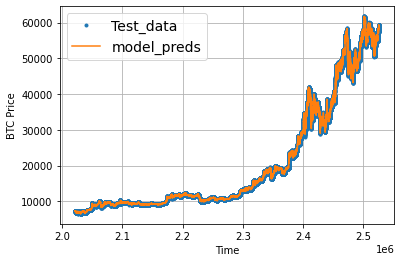

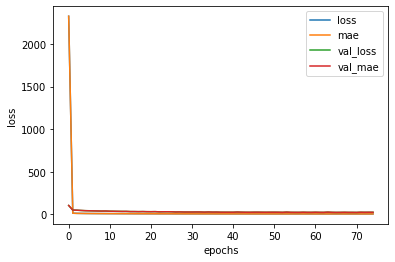

In [ ]:
# model 15 - draft final
import datetime
import tensorflow_hub as hub
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import os

HORIZON = 1
WINDOW_SIZE = 30

# creating tensorboard callback
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving to: {log_dir}")
  return tensorboard_callback

# np.set_printoptions(precision=15, suppress=True)
# btc_data = pd.read_csv(
#     "/content/drive/MyDrive/Science Fair/output.csv",
#     names=["Time", "Open"])

ct = make_column_transformer(
    (MinMaxScaler(), ["Time"])
)

X_btc = btc_data[["Time", "Tone"]]
y_btc = btc_data["Open"]

ct.fit(X_btc, y_btc)
X_btc = ct.transform(X_btc)

print(X_btc)

timesteps = btc_data.index.to_numpy()
prices = btc_data["Open"].to_numpy()

split_size = int(0.8 * len(prices))
# Create train data splits (everything before the split)
X_train_a, y_train_a = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test_a, y_test_a = timesteps[split_size:], prices[split_size:]

def get_labelled_windows(x, horizon=1):
  return x[:, :-horizon], x[:, -horizon:]

def make_windows(x, window_size=7, horizon=1):
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T 

  windowed_array = x[window_indexes]

  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1-test_split)) 
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0, 
                                            save_best_only=True)

def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3)

btc_model_15 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")
], name="model_15")

btc_model_15.compile(loss = "mae",
                    optimizer = tf.optimizers.Adam(learning_rate=0.00002),
                    metrics=["mae"])

history = btc_model_15.fit(x=X_train, y=y_train, 
                          batch_size=12288, 
                          validation_data=(X_test, y_test),
                          epochs=100, 
                          callbacks=[early_stopping, create_model_checkpoint(model_name=btc_model_15.name), create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name=btc_model_15.name)])

btc_model_15.evaluate(X_test, y_test, batch_size=8192)

y_pred = btc_model_15.predict(X_test)

btc_model_15.save("btc_model_15")
btc_model_15.save("btc_model_15.h5")

offset=0
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_test[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_pred, start=offset, format="-", label="model_preds")

# plot loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

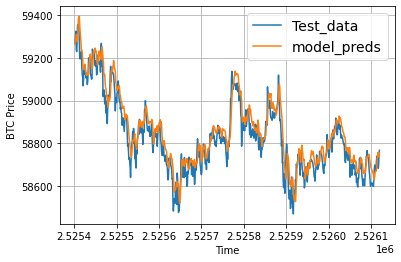

In [ ]:
offset=504500
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_test[:, 0], start=offset, format="-", label="Test_data")
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_pred, start=offset, format="-", label="model_preds")

In [ ]:
btc_data.to_csv("output.csv", index=False)

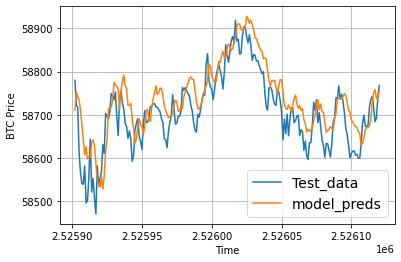

In [9]:
offset=505000
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_test[:, 0], start=offset, format="-", label="Test_data")
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_pred, start=offset, format="-", label="model_preds")